In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calplot as cp
import folium
from folium.plugins import HeatMapWithTime
from urllib.request import urlopen
import json
import plotly.express as px

In [2]:
cols_to_keep = [
    'family',
    'genus',
    'species',
    'locality',
    'coordinateUncertaintyInMeters',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'month',
    'year'
]

In [8]:
# Specify the correct delimiter and handle bad lines (tab separated file)
df = pd.read_csv('./resources/DOF-observations-threathened-and-rare-species-1998-2025.csv', usecols=cols_to_keep, sep='\t', on_bad_lines='skip')

In [10]:
# remove 2025, as the year is not completed yet
df = df[df['year'] != 2025]

# Preview the first few rows to verify the structure
df.head()

,family,genus,species,locality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,eventDate,month,year
0,Threskiornithidae,Platalea,Platalea leucorodia,Bygholm Vejle,57.04859,9.08802,2510.0,2002-05-12,5,2002
1,Pandionidae,Pandion,Pandion haliaetus,Skærsø Plantage,56.23806,10.68577,2240.0,2001-06-13,6,2001
2,Anatidae,Cygnus,Cygnus cygnus,Harboslette,57.09517,8.78545,1660.0,2001-11-16,11,2001
3,Anatidae,Mergus,Mergus merganser,Haderslev Dam,55.23635,9.44826,2370.0,2001-03-18,3,2001
4,Anatidae,Cygnus,Cygnus cygnus,Værnengene,55.85446,8.23863,4060.0,2002-03-14,3,2002


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2544444 entries, 0 to 2598653
Data columns (total 10 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   family                         object 
 1   genus                          object 
 2   species                        object 
 3   locality                       object 
 4   decimalLatitude                float64
 5   decimalLongitude               float64
 6   coordinateUncertaintyInMeters  float64
 7   eventDate                      object 
 8   month                          int64  
 9   year                           int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 213.5+ MB


In [12]:
# only keep the species that are part of the Novama program
species_to_keep = set([
    "Ichthyaetus melanocephalus",
    "Ciconia ciconia",
    "Ciconia nigra",
    "Circus pygargus",
    "Pandion haliaetus",
    "Aquila chrysaetos",
    "Haliaeetus albicilla",
    "Aegolius funereus",
    "Asio flammeus",
    "Falco peregrinus",
    "Anthus campestris"
])

df_novama = df[df["species"].isin(species_to_keep)]
#df_novama.head()
df_novama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616832 entries, 1 to 2598643
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   family                         616832 non-null  object 
 1   genus                          616832 non-null  object 
 2   species                        616832 non-null  object 
 3   locality                       616393 non-null  object 
 4   decimalLatitude                616832 non-null  float64
 5   decimalLongitude               616832 non-null  float64
 6   coordinateUncertaintyInMeters  616832 non-null  float64
 7   eventDate                      616832 non-null  object 
 8   month                          616832 non-null  int64  
 9   year                           616832 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 51.8+ MB


In [16]:

df_yrs = df_novama.value_counts('year')
print(f"year with most registered threathened species: {df_yrs.idxmax()}. Count: {df_yrs.max()}")
print(f"year with least registered threathened species: {df_yrs.idxmin()}. Count: {df_yrs.min()}")

year with most registered threathened species: 2024. Count: 47772
year with least registered threathened species: 1999. Count: 3416


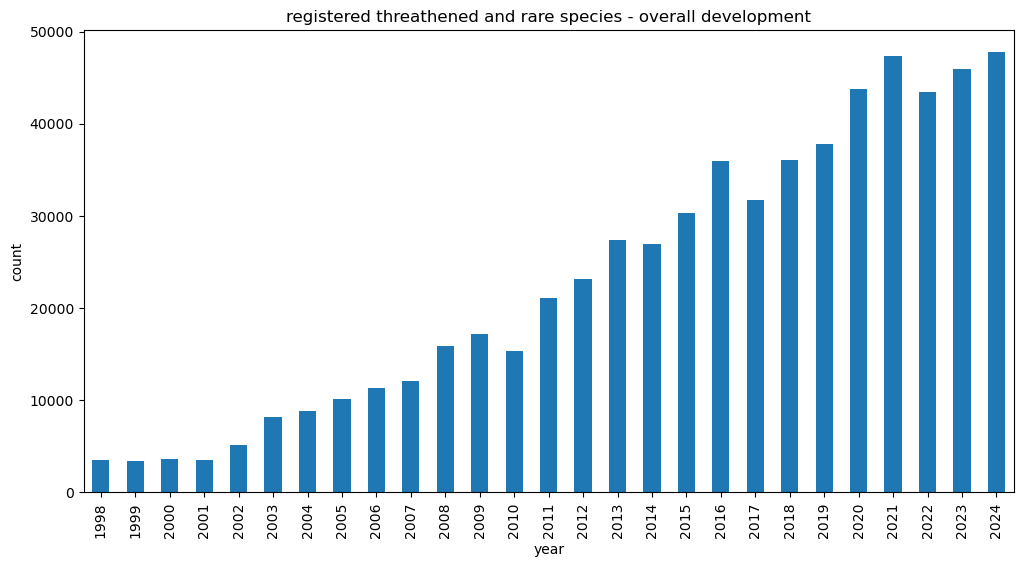

In [17]:
df_yrs = df_yrs.sort_index()

plt.figure(figsize=(12, 6))
df_yrs.plot(kind='bar')
plt.xlabel("year")
plt.ylabel("count")
plt.title("registered threathened and rare species - overall development")
plt.show()

In [18]:
species_yearly = df_novama.groupby(['year', 'species']).size().unstack()
species_yearly = species_yearly.fillna(0.0)
species_yearly.head(20)

species,Aegolius funereus,Anthus campestris,Aquila chrysaetos,Asio flammeus,Ciconia ciconia,Ciconia nigra,Circus pygargus,Falco peregrinus,Haliaeetus albicilla,Ichthyaetus melanocephalus,Pandion haliaetus
year,,,,,,,,,,,
1998,0.0,2.0,62.0,101.0,125.0,2.0,133.0,512.0,887.0,60.0,1611.0
1999,0.0,0.0,71.0,180.0,113.0,8.0,191.0,628.0,553.0,84.0,1588.0
2000,0.0,1.0,99.0,187.0,218.0,5.0,321.0,816.0,426.0,83.0,1504.0
2001,0.0,0.0,77.0,151.0,116.0,5.0,265.0,835.0,721.0,79.0,1228.0
2002,0.0,3.0,178.0,325.0,126.0,4.0,315.0,1413.0,1003.0,134.0,1611.0
2003,1.0,0.0,370.0,541.0,309.0,11.0,350.0,1946.0,1908.0,209.0,2492.0
2004,0.0,0.0,370.0,495.0,273.0,27.0,454.0,2105.0,2181.0,169.0,2699.0
2005,0.0,7.0,394.0,538.0,179.0,0.0,492.0,2653.0,2639.0,176.0,3094.0
2006,0.0,4.0,279.0,546.0,330.0,4.0,632.0,3348.0,3368.0,264.0,2592.0


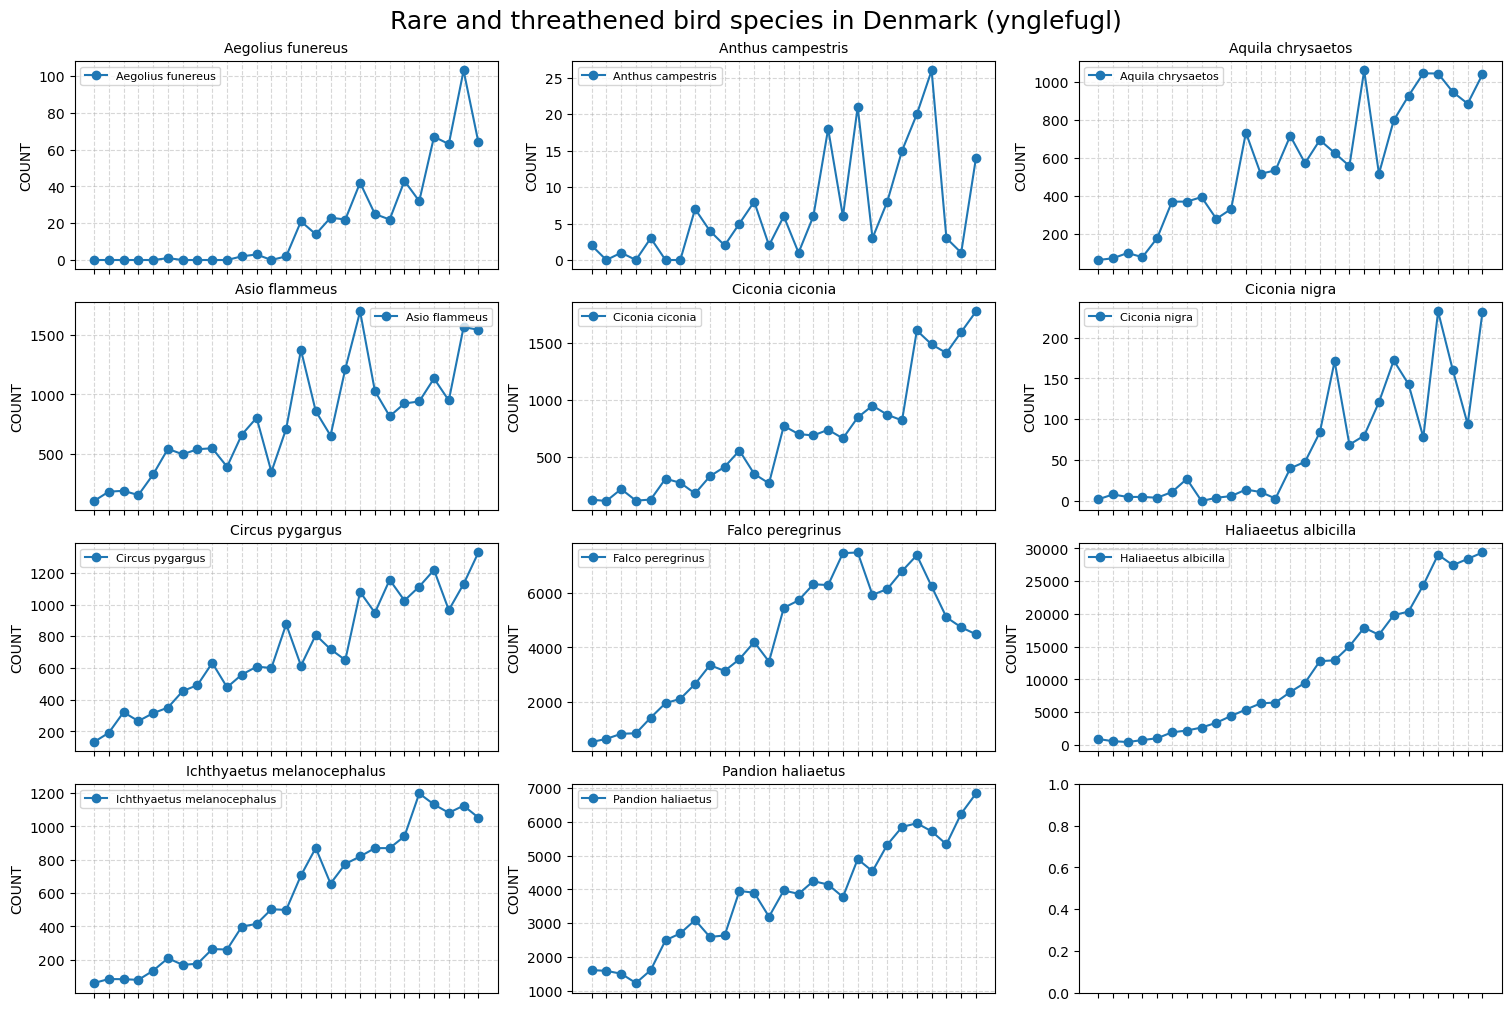

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,10), sharex=True, constrained_layout=True)
axes = axes.flatten()

for i, specie in enumerate(species_yearly.columns):
    axes[i].plot(species_yearly.index, species_yearly[specie], marker='o', label=specie)
    axes[i].set_title(specie, fontsize=10)
    axes[i].set_ylabel("COUNT")
    axes[i].set_xticks(ticks=np.arange(1998, 2025), labels=np.arange(2998, 2025), rotation=90)
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].legend(fontsize=8)

plt.suptitle("Rare and threathened bird species in Denmark (ynglefugl)", fontsize=18)
plt.show()